# WEEK 6

<b>Question 1) Perform classification on FashionMNIST, fashion apparels dataset, using a pre-
trained model which is trained on MNIST handwritten digit classification dataset.</b>

Step 1: Re-run the MNIST program by appending the command torch.save(model,
“./ModelFiles/model.pt”) at the end. Make sure ModelFiles folder exists in the current working
directory.

```torch.save(model,"./ModelFiles/model.pt")```

Using the pretrained model for inference (FashionMNIST_CNN.py):

Step 2: Import libraries same as in MNIST_CNN.py

Step 3: Define the class with same as in MNIST_CNN.py

Step 4: There is no need to train the model hence use testloader.

step 5: Load the pretrained model on to the device

Step 6: Print the model state dictionary. (Same can be done in MNIST_CNN.py)

Step 7: Evaluate the model

In [10]:
import torch
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.abspath("../ModelFiles"))
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [6]:
batch_size = 64
mnist_testset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
test_loader = DataLoader(mnist_testset, batch_size=batch_size, shuffle=False)

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

from CNN_MNIST_Model import CNNClassifier
model = torch.load("../ModelFiles/model_MNIST.pt")
model.to(device)

print("Model's state_dict:")
for param_tensor in model.state_dict().keys():
    print(param_tensor, "\t",model.state_dict()[param_tensor].size())
print()

Model's state_dict:
net.0.weight 	 torch.Size([64, 1, 3, 3])
net.0.bias 	 torch.Size([64])
net.3.weight 	 torch.Size([128, 64, 3, 3])
net.3.bias 	 torch.Size([128])
net.6.weight 	 torch.Size([64, 128, 3, 3])
net.6.bias 	 torch.Size([64])
classification_head.0.weight 	 torch.Size([20, 64])
classification_head.0.bias 	 torch.Size([20])
classification_head.2.weight 	 torch.Size([10, 20])
classification_head.2.bias 	 torch.Size([10])



In [8]:
def train_model():
    epochs = 5
    model.train()
    for _ in range(epochs):
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            loss = criterion(model(inputs), labels)
            loss.backward()
            optimizer.step()
def plot_confusion_matrix(conf_matrix):
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
def test_model():
    model.eval()
    correct = 0
    all_preds = []
    all_labels = []
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

    accuracy = 100 * correct / len(test_loader.dataset)
    conf_matrix = confusion_matrix(all_labels, all_preds)
    return accuracy, conf_matrix

In [12]:
#Fine tuning the dataset
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
train_loader = DataLoader(mnist_testset, batch_size=batch_size, shuffle=True)

test_model()

train_model()
accuracy, conf_matrix=test_model()

Accuracy: 85.35


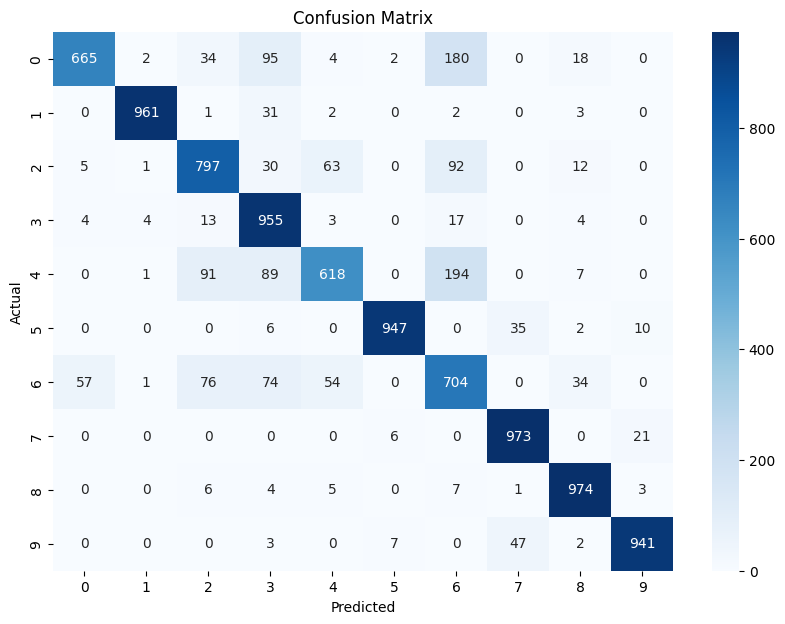

In [13]:
print("Accuracy:",accuracy)
plot_confusion_matrix(conf_matrix)

<b>Question 2) Learn the AlexNet architecture and apply transfer learning to perform the classification
task. Using the pre-trained AlexNet, classify images from the cats_and_dogs_filtered
dataset downloaded from the below link. Finetune the classifier given in AlexNet as a two-
class classifier. Perform pre-processing of images as per the requirement.</b>

Step 1: Import necessary libraries

Step 2: Set AlexNet pretrained to true

In [22]:
import PIL.Image
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import glob
from torchvision.models import AlexNet_Weights
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [23]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
transform = transforms.Compose([
    transforms.Resize((224, 224)), 
    transforms.ToTensor(),  
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) 
])

train_dataset = datasets.ImageFolder(root='./data/cats_and_dogs_filtered/train', transform=transform)
test_dataset = datasets.ImageFolder(root='./data/cats_and_dogs_filtered/validation', transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

In [29]:
model = torch.hub.load('pytorch/vision:v0.10.0', model='alexnet', weights=AlexNet_Weights.DEFAULT)
for param in model.parameters():
    param.requires_grad = False
model.classifier[6] = torch.nn.Linear(in_features=4096, out_features=2)
# loss_fn = torch.nn.CrossEntropyLoss()
# optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
model = model.to(device)

Using cache found in /home/student/.cache/torch/hub/pytorch_vision_v0.10.0


Accuracy: 49.7


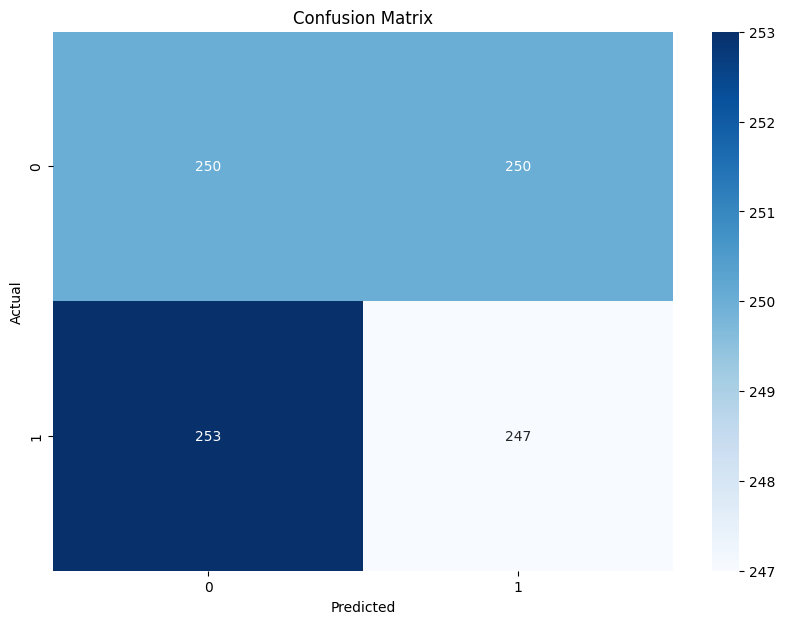

In [32]:
accuracy,conf_matrix = test_model()
print("Accuracy:",accuracy)
plot_confusion_matrix(conf_matrix)

Accuracy: 95.6


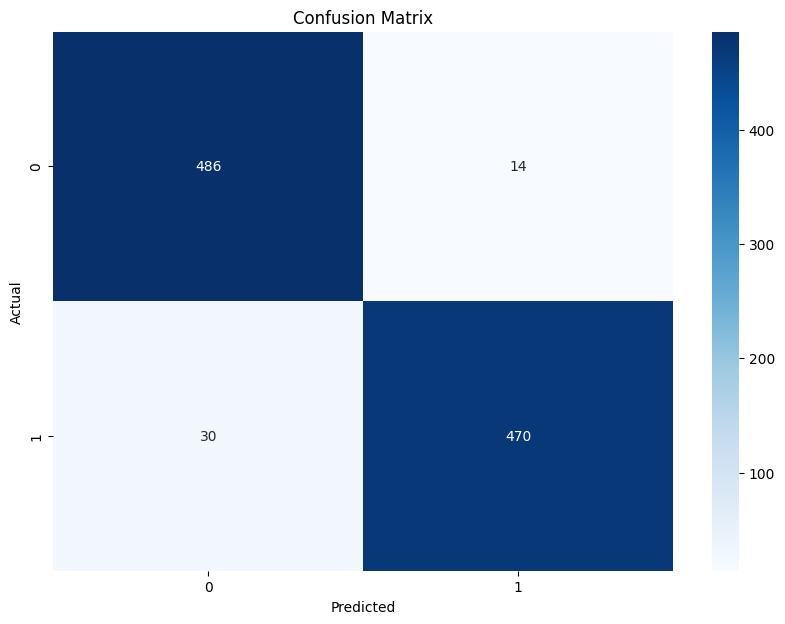

In [34]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_model()

accuracy,conf_matrix = test_model()
print("Accuracy:",accuracy)
plot_confusion_matrix(conf_matrix)

Question 3) Implement check points in PyTorch by saving model state_dict, optimizer state_dict, epochs
and loss during training so that the training can be resumed at a later point. Also, illustrate
the use of check point to save the best found parameters during training.

In [25]:
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = CNNClassifier().to(device)
# check_point = torch.load("../week5/checkpoints/checkpoint.pt")
# model.load_state_dict(check_point["model_state"])
# loss_fn = torch.nn.CrossEntropyLoss()
# optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
# optimizer.load_state_dict(check_point["optimizer_state"])
# loss = check_point["last_loss"]
# EPOCHS = check_point["last_epoch"]
# NEW_EPOCHS = 5
# for epoch in range(EPOCHS, NEW_EPOCHS):

In [19]:
def save_checkpoint(model, optimizer, epoch, loss, checkpoint_path='../week5/checkpoints/checkpoint.pt'):
    checkpoint = {
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': loss,
    }
    torch.save(checkpoint, checkpoint_path)
    print(f"Checkpoint saved at epoch {epoch}, loss {loss:.4f}")


In [20]:
def load_checkpoint(model, optimizer, checkpoint_path='../week5/checkpoints/checkpoint.pt'):
    if os.path.exists(checkpoint_path):
        checkpoint = torch.load(checkpoint_path)
        model.load_state_dict(checkpoint['model_state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        epoch = checkpoint['epoch']
        loss = checkpoint['loss']
        print(f"Checkpoint loaded from epoch {epoch}, loss {loss:.4f}")
        return model, optimizer, epoch, loss
    else:
        print("No checkpoint found, starting fresh.")
        return model, optimizer, 0, None


In [21]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 5
best_loss = float('inf')


for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    save_checkpoint(model, optimizer, epoch, avg_loss, 'checkpoint.pth')
    if avg_loss < best_loss:
        best_loss = avg_loss
        print(f"New best model found with loss {best_loss:.4f}. Saving the model.")
        torch.save(model.state_dict(), 'best_model.pth')
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/len(train_loader):.4f}")


Checkpoint saved at epoch 0, loss 0.3927
New best model found with loss 0.3927. Saving the model.
Epoch [1/5], Loss: 0.3927
Checkpoint saved at epoch 1, loss 0.3711
New best model found with loss 0.3711. Saving the model.
Epoch [2/5], Loss: 0.3711
Checkpoint saved at epoch 2, loss 0.3325
New best model found with loss 0.3325. Saving the model.
Epoch [3/5], Loss: 0.3325
Checkpoint saved at epoch 3, loss 0.3123
New best model found with loss 0.3123. Saving the model.
Epoch [4/5], Loss: 0.3123
Checkpoint saved at epoch 4, loss 0.2943
New best model found with loss 0.2943. Saving the model.
Epoch [5/5], Loss: 0.2943


In [24]:
accuracy,_=test_model()
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 91.10%
